# Titaic Exercise

to install seaborn :
```bash
conda install -c conda-forge seaborn
````


In [33]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [47]:
embarked_labels = {
  "C": "Cherbourg",
  "Q": "Queenstown",
  "S": "Southampton",
}

In [34]:
# 1. Load the dataset
titatic = load_dataset("titanic")
titatic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [35]:
titatic.info()
titatic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
# 2. Data cleaning
# 2.1. Check the missing values
print(titatic.shape)
print(titatic.isnull().sum())

# 2.2. Replace the missing values in age with the mean
titatic["age"] = titatic["age"].fillna(titatic["age"].mean(), inplace=True)

# 2.3. Replace the missing values in deck with "Unknown"
titatic["deck"] = titatic["deck"].fillna("Unknown", inplace=True)

(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

In [37]:
# 3. Exploratory data analysis
# 3.1 overall survive rate
print(titatic["survived"].mean())

0.3838383838383838


In [40]:
# 3.3.1 compute the repartition of the passengers by Pclass and Embarked
repartition = titatic.groupby(["pclass", "embarked"]).size().unstack()
print(repartition)

embarked   C   Q    S
pclass               
1         85   2  127
2         17   3  164
3         66  72  353


NameError: name 'embarked_lebels' is not defined

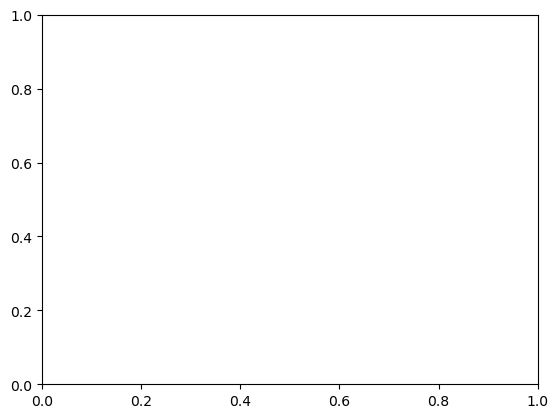

In [46]:
# 3.3.2 Plot the repartition of the passengers by Pclass and Embarked

# Compute the repartition of the passengers by Pclass and Embarked

# Assuming you have the 'repartition' DataFrame as given in your example
embarked_values = repartition.columns
pclass_values = repartition.index
data = repartition.values

bar_width = 0.25
bar_positions = np.arange(len(pclass_values))

fig, ax = plt.subplots()

for i, embarked_value in enumerate(embarked_values):
    ax.bar(bar_positions + i * bar_width, data[:, i], width=bar_width, label=f'Embarked {embarked_labels[embarked_value]}')

ax.set_xlabel('Passenger Class')
ax.set_ylabel('Count')
ax.set_title('Passenger Class Distribution by Embarked')
ax.set_xticks(bar_positions + bar_width * (len(embarked_values) - 1) / 2)
ax.set_xticklabels(pclass_values)
ax.legend()

plt.show()